# 25K examples

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import joblib
import random

In [2]:
sc, clf, selectFeatureNameList = joblib.load('SVM_training/pileup_only_features.pkl')

In [3]:
X_test = np.load('SVM_training/X_test.npy')
y_test = np.load('SVM_training/y_test.npy')

In [4]:
x_test_std_new = sc.transform(X_test)

In [5]:
precursor_only_predictions = clf.predict(x_test_std_new)

In [6]:
print(classification_report(y_test, precursor_only_predictions))

              precision    recall  f1-score   support

          -1       0.93      0.92      0.92      2438
           1       0.92      0.92      0.92      2382

    accuracy                           0.92      4820
   macro avg       0.92      0.92      0.92      4820
weighted avg       0.92      0.92      0.92      4820



In [8]:
sum(y_test != precursor_only_predictions)

368

In [20]:
''' this is the code used to split, thankfully we set the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
            data_x, data_y, test_size=0.20, random_state=101)
        np.save('X_test', X_test)
        np.save('y_test', y_test)
'''

" this is the code used to split, thankfully we set the random seed for reproducibility\nX_train, X_test, y_train, y_test = train_test_split(\n            data_x, data_y, test_size=0.20, random_state=101)\n        np.save('X_test', X_test)\n        np.save('y_test', y_test)\n"

In [87]:
featureListSelected = []
with open('SVM_training/selected_features.txt', 'r') as inf:
    line = inf.readline()
    line = inf.readline()
    while line != '':
        featureListSelected.append((float(line.strip().split('\t')[1]), int(
            line.strip().split('\t')[2]), line.strip().split('\t')[0]))
        line = inf.readline()

In [88]:
featureListSelected

[(0.37, 58, 'count_bindings_in_miRNA'),
 (0.168, 2, 'exactMatchRatio'),
 (0.146, 101, 'pair_state_No'),
 (0.146, 57, 'mFE'),
 (0.12, 5, 'head_minus3_TemplateNucleotide_percentage'),
 (0.112, 52, 'hairpin_count'),
 (0.109, 56, 'stem_length'),
 (0.095, 50, 'distanceToloop'),
 (0.079, 51, 'percentage_PairedInMiRNA'),
 (0.079, 3, 'headUnstableLength'),
 (0.078, 102, 'pair_state_Yes'),
 (0.064, 26, 'tail_plus2_A_percentage'),
 (0.064, 10, 'head_minus2_TemplateNucleotide_percentage'),
 (0.06, 53, 'binding_count'),
 (0.059, 21, 'tail_plus1_A_percentage'),
 (0.038, 97, 'armType_loop'),
 (0.038, 31, 'tail_plus3_A_percentage'),
 (0.037, 40, 'tail_plus5_TemplateNucleotide_percentage'),
 (0.034, 20, 'tail_plus1_TemplateNucleotide_percentage'),
 (0.033, 54, 'interiorLoopCount'),
 (0.033, 15, 'head_minus1_TemplateNucleotide_percentage')]

In [2]:
data = pd.read_csv('SVM_training/all_tissues_mapped_dataset_15_refined_miRGeneDB_total_features_updated.csv')

In [30]:
data.head()

,realMicRNA,realMicRNAName,clusterName,seqCount,readCountSum,exactMatchRatio,headUnstableLength,tailUnstableLength,head_minus3_templateNucleotide,head_minus3_TemplateNucleotide_percentage,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,1,hsa-miR-200b-5p,mapped_mirna_ERR038410:miRCluster_1_22:chr1:11...,3,11,0.636364,0,2,G,0.0,...,0.95,1,34,6,6,34,-42.9,20,No,Yes
1,1,hsa-miR-200b-3p,mapped_mirna_ERR038410:miRCluster_2_24:chr1:11...,20,159,0.327044,2,4,C,0.0,...,0.90,1,32,5,6,32,-40.9,18,No,Yes
2,1,hsa-miR-200a-3p,mapped_mirna_ERR038410:miRCluster_3_23:chr1:11...,15,235,0.565957,0,1,C,0.0,...,0.78,1,32,4,5,32,-45.5,18,No,No
3,1,hsa-miR-429,mapped_mirna_ERR038410:miRCluster_4_22:chr1:11...,3,27,0.925926,0,0,G,0.0,...,0.77,1,29,3,10,29,-38.8,17,No,No
4,1,hsa-miR-34a-5p,mapped_mirna_ERR038410:miRCluster_31_23:chr1:9...,10,70,0.828571,0,4,C,0.0,...,0.90,1,35,5,4,35,-39.2,18,No,No


In [31]:
data.columns.tolist()

['realMicRNA',
 'realMicRNAName',
 'clusterName',
 'seqCount',
 'readCountSum',
 'exactMatchRatio',
 'headUnstableLength',
 'tailUnstableLength',
 'head_minus3_templateNucleotide',
 'head_minus3_TemplateNucleotide_percentage',
 'head_minus3_A_percentage',
 'head_minus3_T_percentage',
 'head_minus3_C_percentage',
 'head_minus3_G_percentage',
 'head_minus2_templateNucleotide',
 'head_minus2_TemplateNucleotide_percentage',
 'head_minus2_A_percentage',
 'head_minus2_T_percentage',
 'head_minus2_C_percentage',
 'head_minus2_G_percentage',
 'head_minus1_templateNucleotide',
 'head_minus1_TemplateNucleotide_percentage',
 'head_minus1_A_percentage',
 'head_minus1_T_percentage',
 'head_minus1_C_percentage',
 'head_minus1_G_percentage',
 'tail_plus1_templateNucleotide',
 'tail_plus1_TemplateNucleotide_percentage',
 'tail_plus1_A_percentage',
 'tail_plus1_T_percentage',
 'tail_plus1_C_percentage',
 'tail_plus1_G_percentage',
 'tail_plus2_templateNucleotide',
 'tail_plus2_TemplateNucleotide_percen

# does mFE distinguish?

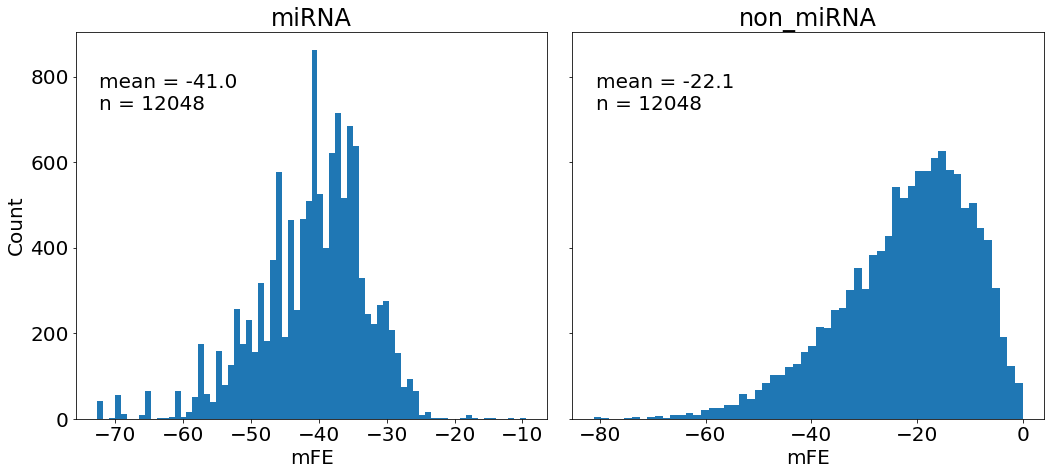

In [29]:
plt.rcParams['font.size'] = 20
fig, axs = plt.subplots(1, 2, figsize = (15, 7), sharey=True)
axs[0].hist(data[data['realMicRNA'] == 1]['mFE'], bins='auto');
axs[0].set_title('miRNA');
axs[0].set_ylabel('Count')
axs[0].text(0.05, .8, 'mean = {mean}\nn = {n}'.format(mean=round(data[data['realMicRNA'] == 1]['mFE'].mean(), 1), 
                                                     n=len(data[data['realMicRNA'] == 1])),
                       transform=axs[0].transAxes)
axs[1].hist(data[data['realMicRNA'] == -1]['mFE'], bins='auto');
axs[1].set_title('non_miRNA')
axs[1].text(0.05, .8, 'mean = {mean}\nn = {n}'.format(mean=round(data[data['realMicRNA'] == -1]['mFE'].mean(), 1), 
                                                     n=len(data[data['realMicRNA'] == -1])),
                       transform=axs[1].transAxes)
[ax.set_xlabel('mFE') for ax in axs.flatten()]
fig.tight_layout()

In [90]:
labels = [re.search('(?<=mapped_)[^_]*', name).group(0) for name in data['clusterName'].values]

In [91]:
len(data.columns)

74

In [92]:
data_no_cn = data.drop(data.columns[[1, 2]], axis=1)
data_dummies = pd.get_dummies(data_no_cn)
data_dummies = data_dummies.reset_index()[[col for col in data_dummies] + ['index']]
#featureList = data.columns.values.tolist()[1:]                                                                                                                                                                                                                       

# subselect data with the selected features                                                                                                                                                                                                                           
totalfeatureList = data_dummies.columns.values.tolist()
subIndexList = [totalfeatureList.index(
    item[2]) for item in featureListSelected] + [len(data_dummies.columns) - 1]
# Creat a variable for the feature data                                                                                                                                                                                                                               
data_x = data_dummies.iloc[:, subIndexList].values
# Create a variable for the target data                                                                                                                                                                                                                               
data_y = data_dummies.iloc[:, 0].values

df_cn = data_dummies.iloc[:, subIndexList].merge(data['clusterName'], left_index=True, right_index=True)

In [94]:
df_cn

,count_bindings_in_miRNA,exactMatchRatio,pair_state_No,mFE,head_minus3_TemplateNucleotide_percentage,hairpin_count,stem_length,distanceToloop,percentage_PairedInMiRNA,headUnstableLength,...,binding_count,tail_plus1_A_percentage,armType_loop,tail_plus3_A_percentage,tail_plus5_TemplateNucleotide_percentage,tail_plus1_TemplateNucleotide_percentage,interiorLoopCount,head_minus1_TemplateNucleotide_percentage,index,clusterName
0,20,0.636364,0,-42.9,0.0,1,34,5,0.95,0,...,34,0.000000,0,0.0,0.0,1.000000,6,0.0,0,mapped_mirna_ERR038410:miRCluster_1_22:chr1:11...
1,18,0.327044,0,-40.9,0.0,1,32,6,0.90,2,...,32,0.625000,0,0.0,0.0,0.936000,5,1.0,1,mapped_mirna_ERR038410:miRCluster_2_24:chr1:11...
2,18,0.565957,1,-45.5,0.0,1,32,12,0.78,0,...,32,0.170455,0,0.0,0.0,0.000000,4,0.0,2,mapped_mirna_ERR038410:miRCluster_3_23:chr1:11...
3,17,0.925926,1,-38.8,0.0,1,29,3,0.77,0,...,29,0.000000,0,0.0,0.0,0.000000,3,0.0,3,mapped_mirna_ERR038410:miRCluster_4_22:chr1:11...
4,18,0.828571,1,-39.2,0.0,1,35,9,0.90,0,...,35,0.000000,0,1.0,0.0,1.000000,5,0.0,4,mapped_mirna_ERR038410:miRCluster_31_23:chr1:9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24091,11,1.000000,1,-14.1,0.0,1,11,-17,0.55,0,...,11,0.000000,1,0.0,0.0,1.000000,2,0.0,24091,mapped_nonMirna_SRR944034:miRCluster_9783_22:c...
24092,14,0.100000,1,-19.9,0.0,2,11,-9,0.82,1,...,11,0.000000,1,0.0,0.0,0.777778,0,1.0,24092,mapped_nonMirna_SRR944034:miRCluster_10009_19:...
24093,11,0.086957,1,-35.8,0.0,2,33,-23,0.73,2,...,33,0.000000,0,0.0,0.0,1.000000,6,0.4,24093,mapped_nonMirna_SRR944034:miRCluster_10079_17:...
24094,10,1.000000,1,-11.5,1.0,1,9,-18,0.53,4,...,9,0.000000,1,0.0,0.0,0.000000,1,1.0,24094,mapped_nonMirna_SRR944034:miRCluster_9927_23:c...


In [96]:
def parse_cluster_name(row):
    row['chrom'] = re.search('(?<=chr)[^:]*', row['clusterName']).group(0)
    row['start'] = int(re.search('(?<=chr).*(?=_)', row['clusterName']).group(0).split(':')[1])
    row['end'] = int(re.sub('(\+|\-)', '', re.search('(?<=_)[^_]+$', row['clusterName']).group(0)))
    if row['chrom'] in [str(int_ + 1) for int_ in range(22)] + ['X', 'Y']:
        row['good_chrom'] = True
    else:
        row['good_chrom'] = False
    if re.search('(?<=mapped_)[^_]*', row['clusterName']).group(0) == 'mirna':
        row['miRNA'] = True
    else:
        row['miRNA'] = False
    row['sample'] = re.search('(S|E)RR[^\:]*', row['clusterName']).group(0)
    return row

df_cn = df_cn.apply(parse_cluster_name, axis=1)

In [78]:
df = df_cn[df_cn['good_chrom']].drop('good_chrom', axis=1)

This is a good checkpoint. Now we can plot feature distributions across patients, perhaps seeing that they don't vary much.

In [69]:
hsa_bed = pd.read_csv('mirgenedb/hsa-all.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'annotation', 'orientation', 'strand'])

In [71]:
hsa_bed.dtypes

chrom          object
start           int64
end             int64
annotation     object
orientation     int64
strand         object
dtype: object

In [76]:
df.dtypes

count_bindings_in_miRNA       int64
pair_state_No                 int64
mFE                         float64
hairpin_count                 int64
stem_length                   int64
distanceToloop                int64
percentage_PairedInMiRNA    float64
pair_state_Yes                int64
binding_count                 int64
armType_loop                  int64
interiorLoopCount             int64
index                         int64
clusterName                  object
chrom                        object
start                        object
end                          object
miRNA                          bool
sample                       object
dtype: object

In [79]:
def add_annotation(row, mirgene_df):
    df_chrom = mirgene_df[[chrom[3:] == row['chrom'] for chrom in mirgene_df['chrom']]]
    for start, end, annotation in zip(df_chrom['start'], df_chrom['end'], df_chrom['annotation']):
        if row['start'] > start - 5 and row['end'] < end + 5:
            row['annotation'] = annotation
            return row
    row['annotation'] = float('NaN')
    return row

In [81]:
df = df.apply(add_annotation, mirgene_df = hsa_bed, axis=1)

In [82]:
len(df['annotation'].dropna()) / len(df)

0.4969126727433108

In [83]:
df.to_csv('annotated_25k_cluster_df.csv')

In [15]:
df = pd.read_csv('annotated_25k_cluster_df.csv').drop('Unnamed: 0', axis=1)

(array([106.,  47.,  56.,  54.,  46.,  42.,  50.,   9.,   0.,   0.,   0.,
          1.]),
 array([  1.,  10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91.,
        100., 109.]),
 <BarContainer object of 12 artists>)

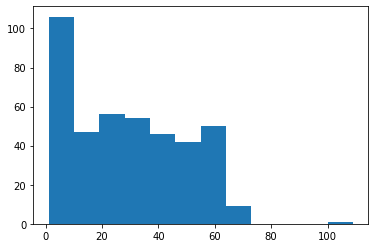

In [21]:
plt.hist(df.groupby('annotation').count()['count_bindings_in_miRNA'], bins='auto')

In [69]:
anns = []
for annotation in random.sample(set(df['annotation']), 50):
    if len(df[df['annotation'] == annotation]) > 30:
        anns.append(annotation)

In [48]:
precursor_features = pd.read_csv('SVM_training/precursor_only_features.txt', sep='\t')['featureName'].tolist()

In [49]:
precursor_features

['count_bindings_in_miRNA',
 'pair_state_No',
 'mFE',
 'hairpin_count',
 'stem_length',
 'distanceToloop',
 'percentage_PairedInMiRNA',
 'pair_state_Yes',
 'binding_count',
 'armType_loop',
 'interiorLoopCount']

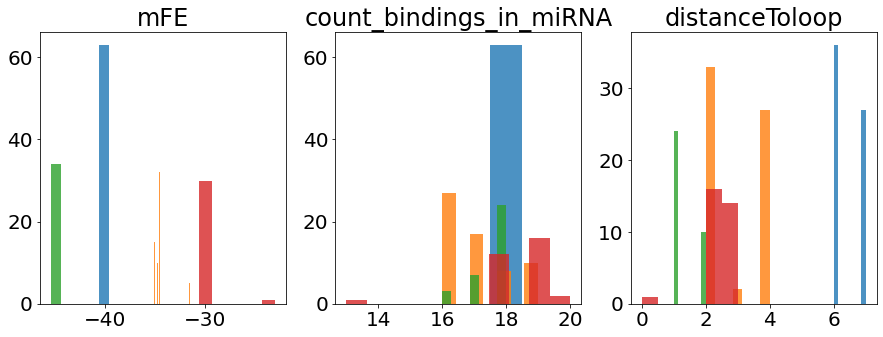

In [67]:
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for feature, ax in zip(['mFE', 'count_bindings_in_miRNA', 'distanceToloop'], axes.flatten()):
    if feature == 'hairpin_count':
        continue
    for annotation in anns[:4]:
        ax.hist(df[df['annotation'] == annotation][feature], bins='auto', alpha = 0.8)
    ax.set_title('{feature}'.format(feature=feature))

In [72]:
len(anns[:-1])

25

In [85]:
df.columns

Index(['count_bindings_in_miRNA', 'pair_state_No', 'mFE', 'hairpin_count',
       'stem_length', 'distanceToloop', 'percentage_PairedInMiRNA',
       'pair_state_Yes', 'binding_count', 'armType_loop', 'interiorLoopCount',
       'index', 'clusterName', 'chrom', 'start', 'end', 'miRNA', 'sample',
       'annotation'],
      dtype='object')

KeyError: 'exactMatchRatio'

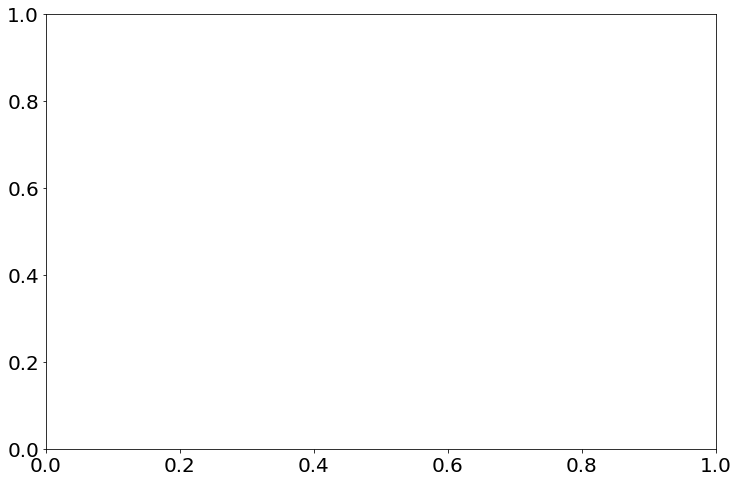

In [84]:
fig, ax = plt.subplots(figsize = (12, 8))
for ann in anns[-10:]:
    ax.hist(df[df['annotation'] == ann]['exactMatchRatio'], bins='auto', alpha = 0.8)
    ax.set_title('mFE variation across samples')

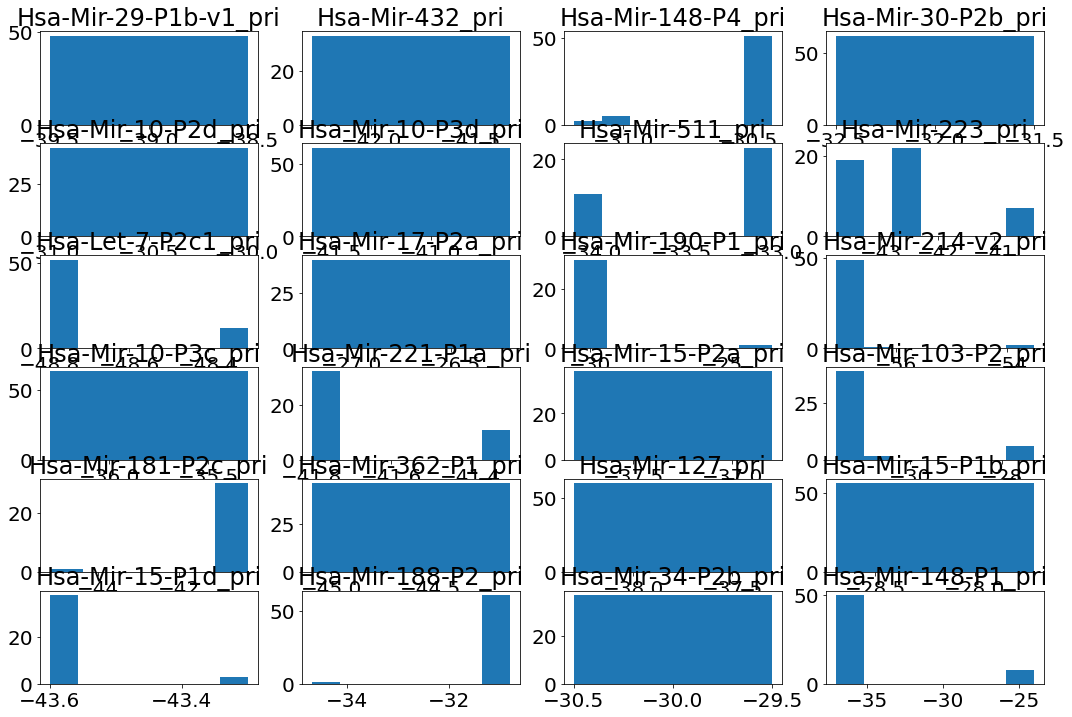

In [75]:
fig, axs = plt.subplots(6, 4, figsize = (18, 12))
for ann, ax in zip(anns, axs.flatten()):
    ax.hist(df[df['annotation'] == ann]['mFE'], bins='auto')
    ax.set_title(ann)

In [45]:
mirna_1 = mirna[mirna['chrom'] == '1']

Text(0.5, 1.0, 'Annotations across patients')

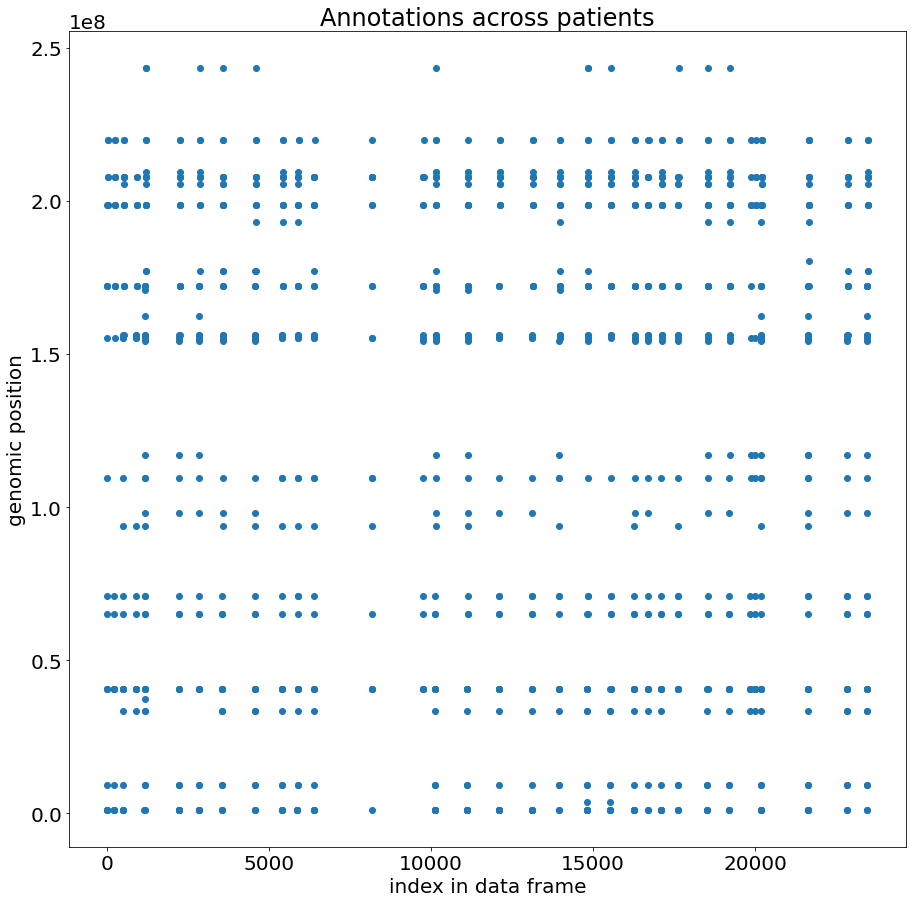

In [61]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.size'] = 20
plt.scatter(mirna_1.index, mirna_1['start'].astype(int));
plt.xlabel('index in data frame')
plt.ylabel('genomic position')
plt.title('Annotations across patients')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
            data_x, data_y, test_size=0.20, random_state=101)

In [27]:
X_test[:, -1]

array([ 1413., 14389.,  5663., ..., 21148., 13069., 23465.])

In [28]:
misclassified = X_test[y_test != predictions, -1]

In [29]:
data[data['index'].isin(misclassified)]

,realMicRNA,seqCount,readCountSum,exactMatchRatio,headUnstableLength,tailUnstableLength,head_minus3_TemplateNucleotide_percentage,head_minus3_A_percentage,head_minus3_T_percentage,head_minus3_C_percentage,...,tail_plus6_templateNucleotide_T,armType_arm3,armType_arm5,armType_loop,armType_unmatchedRegion,UGU_UGUG_motif_No,UGU_UGUG_motif_Yes,pair_state_No,pair_state_Yes,index
215,-1,5,58,1.000000,1,3,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,215
459,-1,12,76,0.368421,2,2,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,459
1114,1,8,134,0.828358,0,1,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,1114
1147,-1,8,406,1.000000,0,3,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,1147
1630,1,3,31,1.000000,0,0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,1630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,1,7,24,0.583333,3,6,1.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,20517
20910,-1,3,11,1.000000,0,2,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,20910
21500,-1,11,172,0.011628,1,3,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,21500
21638,1,3,11,0.363636,1,9,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,21638


In [31]:
data

,realMicRNA,seqCount,readCountSum,exactMatchRatio,headUnstableLength,tailUnstableLength,head_minus3_TemplateNucleotide_percentage,head_minus3_A_percentage,head_minus3_T_percentage,head_minus3_C_percentage,...,tail_plus6_templateNucleotide_T,armType_arm3,armType_arm5,armType_loop,armType_unmatchedRegion,UGU_UGUG_motif_No,UGU_UGUG_motif_Yes,pair_state_No,pair_state_Yes,index
0,1,3,11,0.636364,0,2,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,1,0
1,1,20,159,0.327044,2,4,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,1
2,1,15,235,0.565957,0,1,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,2
3,1,3,27,0.925926,0,0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,3
4,1,10,70,0.828571,0,4,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24091,-1,3,59,1.000000,0,2,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,1,0,24091
24092,-1,6,20,0.100000,1,4,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,1,0,24092
24093,-1,8,23,0.086957,2,2,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,24093
24094,-1,4,11,1.000000,4,0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,1,0,24094
